# Generators

This is a concept listed in the NHS’s National Competency Framework as a
requirement for intermediate Python Proficiency (SA21). In this
tutorial, we are going to cover:

-   What they are
-   When it makes sense to use them and when not
-   Example use cases:
    -   **Data pipelines:** pre-processing large volumes of data
        *before* they reach your dataframes
    -   **API calls:** loading large volumes of real-time data without
        overloading memory
    -   **Modelling queuing problems and pathways:** a simple
        introduction to how generators are used in Discrete Event
        Simulation

> **Download**
>
> We very much recommend downloading the Jupyter Notebook so that you
> can run the code cells and see how the outputs change. You can do this
> by clicking on the “Jupyter” link under “Other Formats” over on the
> right-hand side below the page contents.

## What are generators?

Simply put, a generator is something that allows us to tackle *step by
step* a task that is either very large, open-ended or where we want to
ensure that certain criteria are met before proceeding to the next step,
without trying to complete the entire task in one go.

With tasks processing very large amounts of data, we run the risk of
overloading the computer’s memory.

With open-ended tasks, i.e. when the final number of items in our output
is not known at the start, we might need to set up an infinite loop
(`while True:`) instead of defining a specific range to iterate over,
and generators allow us to use these in a controlled manner.

In programs where multiple iterative processes depend on the successful
completion of each iteration of the others before proceeding, we can use
generators. For example: complete step 1 of process A, return an output,
complete step 1 of process B, return an output, and then pick up process
A again at step 2, and so on. This is a bit more difficult to picture,
but we will return to this when we have a look at Discrete Event
Simulation.

### How to create a generator function: the `yield` keyword.

Let’s now have a look at how to create a generator function and how they
differ from ordinary functions.

The main difference is that instead of using the `return` keyword,
generator functions use the `yield` keyword.

Consider the following infinite loop function, courtesy of [Real
Python](https://realpython.com/videos/understanding-generators/). The
intention is to return numbers incrementally and indefinitely
(`while True:` creates an infinite loop). However, `return` will only
produce the first value in the sequence before ending the execution of
the function. No matter how many times you run the cell below, it will
only return “0”.

In [1]:
def infinite_sequence():
    num = 0
    while True:
        return num
        num += 1
        
infinite_sequence()

0

Let’s now have a look at the same function, but this time replacing
`return` with `yield`. Generators defined in this way create generator
*objects*, which have to be assigned to a variable before they can be
used.

In [2]:
def infinite_sequence_gen():
    num = 0
    while True:
        yield num
        num += 1

infinite = infinite_sequence_gen()

A generator object is an *iterable*, that is to say an object type that
can be iterated over item by item (another example of an iterable would
be a *list*). This means that we can use Python’s in-built `next`
function to generate an output. Try running the following cell multiple
times, as long as you like: it will keep incrementing the number up
forever.

In [3]:
next(infinite)

0

Generators return the next value in the sequence, remembering their
place in that sequence. This means that they don’t have to produce the
entire output in one go, and instead can return one element at a time.

In contrast to normal functions, where once `return` is reached the
function’s execution is terminated, generators can contain multiple
`yield` expressions and the generator will “remember” which one it got
to in the previous iteration and move onto the next one. Run the next
code cell once to set up the definition of the generator, then run the
subsequent cell until you get to the end of the song.

In [4]:
n_speckled_frogs = 5 # the number of speckled frogs on the speckled log.

def frog_song():
    num = n_speckled_frogs
    yield f'{num} little speckled frogs'
    while True:
        yield 'Sat on a speckled log'
        yield 'Eating the most delicious bugs'
        yield 'YUM YUM!'
        yield 'One jumped into the pool'
        yield 'Where it was nice and cool'
        num -=1
        if num == 0:
            yield 'Then there were no more speckled frogs!'
            break
        elif num == 1:
            yield 'Then there was 1 more speckled frog. Glub glub.'
            yield f'{num} little speckled frog'
        else:
            yield f'Then there were {num} more speckled frogs. Glub glub.'
            yield f'{num} little speckled frogs'


froggy_fun = frog_song()

In [5]:
# Run this cell and sing along!
next(froggy_fun)

'5 little speckled frogs'

### Generator comprehensions.

It is also possible to create generators in a similar way to list
comprehensions. To make it a generator, write the comprehension in
parentheses: ( ). It can then be iterated over in the same way as with a
generator defined as a function, using `next()`.

#### List comprehension:

In [6]:
square_numbers_lc = [i**2 for i in range(5)]

square_numbers_lc

[0, 1, 4, 9, 16]

#### Generator comprehension

In [7]:
square_numbers_gc = (i**2 for i in range(5))

Now to iterate over it, run this cell until the generator is used up.

In [8]:
next(square_numbers_gc)

0

> **StopIteration**
>
> Did you see a StopIteration error? This happens when a generator is
> forced to go beyond the end of any finite range it has been given to
> work with. There are ways to handle these errors and we will return to
> them.

## When should I use generators?

The main trade-off that comes with using generators is **memory burden**
versus **speed**.

We can create a quick comparison between the size and speed of
generators that process information step-by-step versus approaches that
process information all in one go by creating another pair of
comprehensions, but this time encompassing a much greater range so that
the differences are plainer to see.

Let’s define them first:

In [9]:
lc_test = [i**2 for i in range(100000)]

gc_test = (i**2 for i in range(100000))

### Memory burden

First of all, how much memory does each of these take up?

In [10]:
import sys # in-built Python library that can be used to access system information

list_size = sys.getsizeof(lc_test)
generator_size = sys.getsizeof(gc_test)

print(f'The list takes up {list_size} bytes in memory')
print(f'The generator takes up {generator_size} bytes in memory')

The list takes up 800984 bytes in memory
The generator takes up 200 bytes in memory

The list evidently takes up far more space in memory than the generator.
That is because the list is being created all at once (all 99,999
intergers), whereas the generator is really just storing the
*instructions* for the comprehension, plus its current *state* (i.e.,
which iteration it has got to).

This is a very trivial example, but imagine if you are working with
hundreds of thousands of *rows* of data. You would be dealing a much
greater volume of data. Trying to process all of that data in one go
would place a much greater burden on the computer’s memory than
processing it row by row.

The size of the generator remains roughly the same, despite the fact
that we are dealing with much more data, but the size of the list grows
with the volume of data.

In [11]:
file = ('./data/ldahc.csv')

csv_list_comp = [row for row in open(file)]
csv_gen_comp = (row for row in open(file))

csv_list_comp_size = sys.getsizeof(csv_list_comp)
csv_gen_comp_size = sys.getsizeof(csv_gen_comp)

print(f'The size of the list comprehension is {csv_list_comp_size} bytes')
print(f'The size of the generator comprehension is {csv_gen_comp_size} bytes')

The size of the list comprehension is 800984 bytes
The size of the generator comprehension is 192 bytes

> **Data source**
>
> To run this against the data yourself from a Jupyter Notebook, click
> [here](https://files.digital.nhs.uk/96/B5B8AE/learning-disabilities-health-check-scheme-eng-Jul-2025.csv)
> to start the download from the NHS Digital Publications page. Place
> the file in a `data` folder in the same directory as you Jupyter
> Notebook file. Be sure to rename the file or change the name in the
> filepath above.

#### Should I use it to load .csv files into my `pandas` DataFrames, then?

Since the `pandas` library has already been optimised to some degree[1],
you won’t really gain much from using a generator to load data from a
.csv directly into a Pandas dataframe. `pandas` already has a
`chunksize=` keyword argument in its .read_csv() method for loading data
from a .csv in batches. **However**, as we will see in the use cases
section, you could still consider pre-processing your data *before it
even reaches* `pandas` (think about how `pandas` often makes a best
guess about things like data types, which may not always be correct).

### Speed

How do generators compare when it comes to speed? Let’s return to our
two comprehensions. For this we are going to use the in-built Python
profiler library `cProfile`. Instead of passing a variable name to it,
we need to give it an instruction as a text string.

[1] While `pandas` is reasonably good at handling large volumes of data,
there are other options that are even more memory efficient. The
`polars` library, for example, is much more memory-efficient. We tend to
use `pandas` in our tutorials, because it is a much better developed,
feature-rich library with a relatively straightforward syntax.

In [12]:
import cProfile

The profiler will tell us how many function calls (operations) are being
executed to complete the task and the time it has taken.

First, the list comprehension:

In [13]:
cProfile.run('sum([i**2 for i in range(100000)])')

         4 function calls in 0.010 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.008    0.008    0.010    0.010 <string>:1(<module>)
        1    0.000    0.000    0.010    0.010 {built-in method builtins.exec}
        1    0.002    0.002    0.002    0.002 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}



Then the generator comprehension:

In [14]:
cProfile.run('sum((i**2 for i in range(100000)))')

         100005 function calls in 0.024 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   100001    0.012    0.000    0.012    0.000 <string>:1(<genexpr>)
        1    0.000    0.000    0.024    0.024 <string>:1(<module>)
        1    0.000    0.000    0.024    0.024 {built-in method builtins.exec}
        1    0.012    0.012    0.024    0.024 {built-in method builtins.sum}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}



So using the list comprehension is faster and is making far fewer
function calls. This makes sense, because the generator comprehension is
taking things step by step, whereas the list comprehension is doing
things with fewer leaps and bounds.

In conclusion, generators are useful when the importance of staying
within memory constraints outweighs the need for speed.

## Example use cases

What, then, are some practical uses for generators?

### Data pipelines: pre-processing .csv data

A little earlier, it was mentioned that there is not much to be gained
from using a generator to read large amounts of data directly into a
`pandas` dataframe. However, a generator could be used to perform some
pre-processing *before* the data gets fed into `pandas`. We may want to
do this, if we want to ensure that we do not have mixed data types in a
column, which would be interpreted by `pandas` as an `object`, which is
a bit of a catch-all.

For example, we may receive a data file with a column that is meant to
contain numeric data, but missing values have been filled with the text
string “NULL”. We may want to ensure that such “missing-like” values get
removed.

Here the generator function processes the data line by line to replace
the “NULL” values with empty values and this is passed into a `pandas`
DataFrame. We can then use `pandas` to treat the column as numeric
without running into data type errors.

In [15]:
import pandas as pd

file = './data/missing-like.csv'

df = pd.read_csv(file)

df.head()

In [16]:
import csv

def preprocess_nulls(file):
    with open(file, newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        headers = next(reader)  # column headers are the first iteration in the rows
        yield headers           # yield this separately so that any preprocessing steps don't get applied.
        for row in reader:
            row[2] = row[2].replace('NULL','')
            yield row

df = pd.DataFrame(preprocess_nulls(file=file))
df.columns = df.iloc[0] # set first row as column headings.
df = df.drop(0).reset_index(drop=True) # drop the row that contained the headings.

df

Of course, this is just a demonstration. It would really come into its
own when you are creating a pipeline that pre-processes multiple columns
and 100,000+ rows.

### API calls: loading large volumes of real-time data

Another, even more likely scenario for making use of generators for
importing data is when accessing large amounts of real-time data via an
API. With real-time data, it is not always known how much data will be
coming through and this has the potential to overload memory if
processed in one go.

For this example, we are going to access the Environment Agency’s
real-time [flood warning
data](https://environment.data.gov.uk/flood-monitoring/doc/reference).
We will just use a small example, flood alerts with a minimum severity
of 3, but this could be applied to a much larger dataset.

In [17]:
import requests
# import pandas as pd

def get_flood_alerts():
    request_url = 'https://environment.data.gov.uk/flood-monitoring/id/floods?min-severity=3'
    response = requests.get(request_url)
    results_json = response.json()['items']
    for json in results_json:
        yield {
            'id': json['@id'],
            'description': json['description'],
            'area_name': json['eaAreaName'],
            'flood_area_id': json['floodAreaID'],
            'is_tidal': json['isTidal'],
            'severity': json['severity'],
            'severity_level': json['severityLevel'],
            'time_message_changed': json['timeMessageChanged'],
            'time_raised': json['timeRaised'],
            'time_severity_changed': json['timeSeverityChanged']
        }

alerts = pd.DataFrame(get_flood_alerts())

alerts

197 rows × 10 columns

  
The `for` loop in the non-generator version would look like this:

In [18]:
    alerts = [{
        'id' : json['@id'],
        # etc.
    } for json in results_json]
    return alerts

Using a generator is particularly useful when the data is *paginated*,
that is to say when a huge volume of data (millions of rows) is made
available via an API endpoint across multiple pages, rather than all in
one block.

`https://api.example.com/data?page=1`  
`https://api.example.com/data?page=2`

Iterating over each page *without* using a generator would return
everything in one huge list sitting in memory. Here is a generic example
to illustrate:

In [19]:
def get_all_data():
    data = []
    page = 1
    while True:
        resp = requests.get("https://api.example.com/data", params={"page": page}).json()
        if not resp["results"]:
            break
        data.extend(resp["results"])    
        page += 1
    return data

*With* a generator, you can *stream* the data, processing the items as
they arrive.

In [20]:
def get_all_data_gen():
    page = 1
    while True:
        resp = requests.get("https://api.example.com/data", params={"page": page}).json()
        results = resp["results"]
        if not results:
            break
        for item in results:
            yield item
        page += 1

for record in get_all_data_gen():
    process(record)

### Modelling queueing problems and pathways: Discrete Event Simulation

Discrete Event Simulation (DES) is a fantastic technique for modelling
systems where entities move along a pathway (or pathways) and those
entities queue at different points on a given pathway until resources
become available to perform some kind of task with those entities. One
typical use case is modelling manufacturing production lines, where an
analyst might use DES to determine whether there are any bottlenecks in
the process, meaning that downstream processes are held up, or
conversely where cost savings could be made by removing excess resources
that do not contribute enough of a productivity gain to justify their
deployment. In a healthcare setting, DES models can be used to model
wards or clinics to understand how patients flow through, and different
“what-if” scenarios can be tested out (what if we had one more nurse on
the ward; what if we were able to reduce consultation times by five
minutes), all without risking harm to patients. We can use them to model
branching pathways (e.g. as a result of triage assessments) and to model
resources in terms of staff and “stuff”, that is to say things like beds
and cubicles.

In Python, the package that is typically used for building DES models is
`simpy`. This is used to create an `Environment` object which
co-ordinates and keeps track of the various resources, processes and the
entities subject to those processes.

Generators come into play when we want to simulate patient arrivals.
Imagine we have a pool of patients booked in to attend a clinic within a
2-hour window. It is very unlikely that all of the patients would arrive
at exactly the same time at the beginning of the time window. In a
real-life situation, we would expect people to arrive at different times
(even if it was stipulated that everyone had to arrive punctually, there
would still be people who get held up trying to get to the clinic and
arrive late). Generators allow us to simulate this natual *variability*.
The same applies to the processes at each step in the pathway: we use
the `yield` keyword to release a resource after the simulated amount of
time for the process has elapsed. We can string together processes that
depend on each other and evaluate the impact of changes made to
different parts of the system.

There is a lot more to Discrete Event Simulation, but we will return to
it when we cover the topic in its own session.

Now let’s have a look at a simple model to see generators in action in
this context.

#### Setting the scene: A flu jab clinic

A commissioner wants to see how many receptionists and nurses would be
required to vaccinate a target number of patients during a clinic on a
given day. They want to know how long the clinic would have to run for
to see all the patients as well as the the average and maximum waiting
times.

<figure>
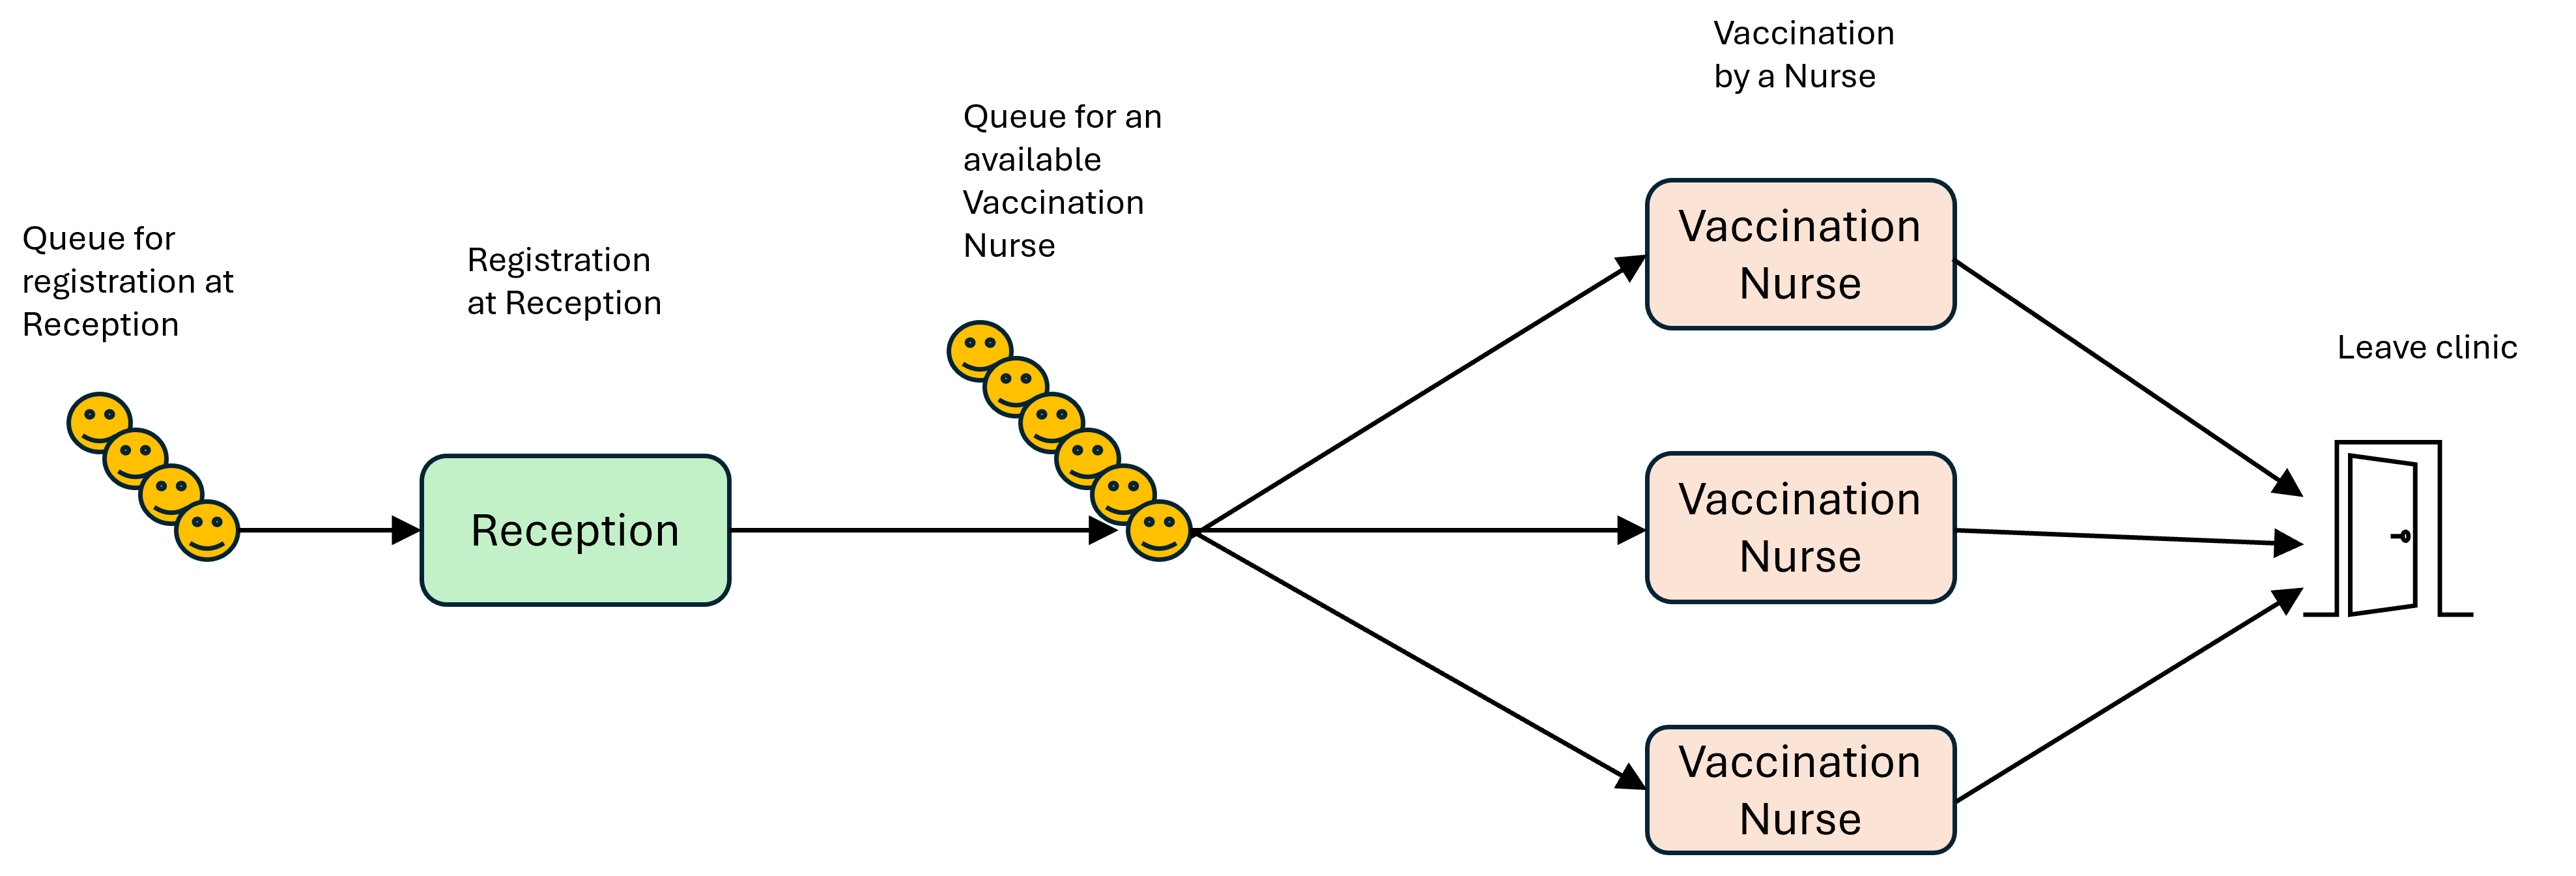
<figcaption aria-hidden="true">Our simple vaccination
clinic</figcaption>
</figure>

#### Clinic parameters

Below are the parameters for our clinic. Try changing them to see what
effect that has on the outcome. Remember that you want to try to balance
things at each stage of the process to minimise queueing times. Do you
need more nurses or more receptionists? What is the best ratio? Can you
cut the total clinic time and still see the patients? How far can you
increase the target number of patients seen?

Most of these parameters should be self-explanatory, but the one you may
not be familiar with is “INTERARRIVAL_TIME”. The interarrival time is
the amount of time between patients arriving at the clinic and joining
the queue for registration with the receptionist. The *average*
interarrival time would then be used to inform the model.

In [21]:
TARGET_PATIENTS_SEEN = 50
RECEPTIONISTS_AVAILABLE = 1
VACCINATION_NURSES_AVAILABLE = 4
MAX_CLINIC_TIME = 450
AVG_REGISTRATION_TIME = 10
AVG_VACCINATION_TIME = 5
INTERARRIVAL_TIME = 3         

> **Data collection**
>
> If you were modelling a healthcare system with Discrete Event
> Simulation in real life, it is likely that you would have to collect
> some of this data yourself by sitting in on real clinics and/or with
> the help of administrative and medical staff. For example, it would
> involve using a stopwatch to record patient interarrival times before
> finding the average.

#### The model itself

The model has been split into sections to make it easier to understand.
We have also stuck to a functional programming structure to keep things
simple, given that we want to keep the focus on the generator functions.
Discrete Event Simulations are normally great examples of
object-oriented programming, because it is suited to modelling entities
interacting with each other.

##### Creating generator functions to model the patient movements

We won’t go into all the details; we can go over those when we do a
session on Discrete Event Simulation. The main things to understand are:

-   The `patient_arrival_generator()` function will generate as many
    patients as defined above in the `TARGET_PATIENTS_SEEN` parameter.
    (If we weren’t interested in a set number of patients, we could
    create an infinite loop with `while True`)

-   After each patient has arrived at the clinic, an interarrival time
    `t` is randomly sampled. It is based on `INTERARRIVAL_TIME` being
    the average of those sampled values.

-   Generation of patients is paused until that time has passed, and
    then the next patient in the sequence gets generated.

-   The `activity_generator()` function is split into two. Each step in
    the process (registration, getting vaccinated) is contained within a
    `with` block. When a `with` block ends, the resource is
    automatically freed up.

-   `env.now` is used to collect timestamps at different points to allow
    us to calculate the length of time spent in each queue.

-   A random amount of time is sampled to represent the amount of time
    each patient spends at registration and getting vaccinated, and
    therefore *how much time they are occupying those resources*.

-   The `.request()` method creates an event object representing a
    request for one unit of capacity of the resource (1 receptionist, 1
    nurse). If capacity is available, the request can be fulfilled and
    the process continues; if not, the process is frozen for that
    patient (i.e. the patient joins the queue for the resource) until
    SimPy is able to give access to the resource and the process can
    continue.

-   The fact that generators with `yield` are being used enables us to
    move on to the next step in a sequence for each individual patient.

> **Queueing outputs**
>
> To see the printout of the times patients joined queues and started
> each process, un-comment lines **42, 45, 57, 66, 69** where you see
> the `print()` statements. They have been commented out for display on
> the web page since the output is quite long!

In [22]:
import simpy
import random

# Arrivals generator function

def patient_arrival_generator(env, INTERARRIVAL_TIME, AVG_REGISTRATION_TIME, AVG_VACCINATION_TIME,receptionist,nurse):
    patient_id = 0

    for patient_id in range(int(TARGET_PATIENTS_SEEN)):
        # create an instance of the activity generator
        patient_act = activity_generator(env,AVG_REGISTRATION_TIME,AVG_VACCINATION_TIME,receptionist,nurse,patient_id)

        # run the activity generator for this patient
        env.process(patient_act)

        # sample the time until next patient
        t = random.expovariate(1.0 / INTERARRIVAL_TIME)

        # freeze the arrival generator until that time has passed
        yield env.timeout(t)

        # increment the patient ID number for the next patient
        patient_id +=1

# Activity generator function

def activity_generator(env, AVG_REGISTRATION_TIME, AVG_VACCINATION_TIME, receptionist, nurse, patient_id):

    # reference some global variables, i.e. ones that exist outside of this function.
    # we want to pass the waiting times out to these buckets so that we can use them later.
    global list_of_queueing_times_registration
    global list_of_queueing_times_nurse
    
    # record the time a patient arrives and enters the queue for registration
    time_entered_queue_for_registration = env.now

    with receptionist.request() as req:
        # freeze until the request can be met, i.e. when a receptionist is available.
        yield req

        time_left_queue_for_registration = env.now
        # print(f'Patient {patient_id} left the queue for the receptionist at {time_left_queue_for_registration:.2f}')

        time_in_queue_for_registration = time_left_queue_for_registration - time_entered_queue_for_registration
        # print(f'Patient {patient_id} queued for registration for {time_in_queue_for_registration:.2f} minutes')

        # add the waiting time to the global list
        list_of_queueing_times_registration.append(time_in_queue_for_registration)

        # sampled time spent with with receptionist during registration
        sampled_registration_time = random.expovariate(1.0 / AVG_REGISTRATION_TIME)

        # freeze the activity generator until that time has passed
        yield env.timeout(sampled_registration_time)

    time_entered_queue_for_nurse = env.now
    # print(f'Patient {patient_id} joined the queue for the nurse at {time_entered_queue_for_nurse:.2f}')

    # request a nurse
    with nurse.request() as req:
        # freeze until the request can be met, i.e. when a nurse is available.
        yield req

        # calculate the time the patient was queuing
        time_left_queue_for_nurse = env.now
        # print(f'Patient {patient_id} left the queue for the nurse at {time_left_queue_for_nurse:.2f}')

        time_in_queue_for_nurse = time_left_queue_for_nurse - time_entered_queue_for_nurse
        # print(f'Patient {patient_id} queued for the nurse for {time_in_queue_for_nurse:.2f} minutes')

        # add the waiting time to the global list
        list_of_queueing_times_nurse.append(time_in_queue_for_nurse)

        # sampled time spent with nurse receiving the vaccination
        sampled_vaccination_time = random.expovariate(1.0 / AVG_VACCINATION_TIME)

        # freeze the activity generator until that time has passed
        yield env.timeout(sampled_vaccination_time)

##### Setting up the SimPy simulation environment

In this section, we create an environment inside which the processes
take place, and define `nurse` and `receptionist` as SimPy `Resource`
objects. We also set up our lists that will log the queueing times so
that the `max` and `mean` of each can be calculated.

In [23]:
# instantiate SimPy simulation environment
env = simpy.Environment()

# set up resources:
# Nurses and receptionists inhabit our simulated clinic environment "env".
# "Capacity" relates to the number of units of each resource.
nurse = simpy.Resource(env, capacity=VACCINATION_NURSES_AVAILABLE)
receptionist = simpy.Resource(env, capacity=RECEPTIONISTS_AVAILABLE)

# initiate lists to collect waiting times
list_of_queueing_times_registration = []
list_of_queueing_times_nurse = []

> **Global variables**
>
> Do you recall seeing the waiting lists referred to as `global`
> variables within the `activity_generator()` function? Ordinarily,
> variables defined inside functions cannot be accessed from outside
> them. Using the `global` keyword means that values assigned to these
> variables can be accessed by other parts of the program.

##### Running the simulation

We set off the patient arrivals generator function and tell SimPy to run
the simulation for the number of time units defined in our clinic
parameters. In this example, we are trying to see what resources are
needed to treat the target number of patients within a fixed time
period. However, you could also run the simulation without using the
`until` argument and it will run until all of the patients have been
treated.

Was the vaccination team able to get through the target number of
patients within the permitted clinic time?

In [24]:
# start the arrivals generator
env.process(patient_arrival_generator(env, INTERARRIVAL_TIME, AVG_REGISTRATION_TIME, AVG_VACCINATION_TIME,receptionist,nurse))

# run the simulation for TOTAL_CLINIC_TIME units of time ("minutes")
env.run(until=MAX_CLINIC_TIME) 

##### Calculate some metrics relating to the queueing times

Now we can do something with those global variables to derive the
metrics we can use to evaluate the configuration of our vaccination
clinic. Would you say that the waiting times for both stages of the
clinic are acceptable?

In [25]:
from statistics import mean

# calculate and print mean/max queueing times for registration
mean_queue_time_registration = mean(list_of_queueing_times_registration)
max_queue_time_registration = max(list_of_queueing_times_registration)
print(f"Mean queuing time for registration (mins) : {mean_queue_time_registration:.2f}")
print(f"Max queuing time for registration (mins) : {max_queue_time_registration:.2f}")

# calculate and print mean/max queueing time for the nurses
mean_queue_time_nurse = mean(list_of_queueing_times_nurse)
max_queue_time_nurse = max(list_of_queueing_times_nurse)
print(f"Mean queuing time for the nurses (mins) : {mean_queue_time_nurse:.2f}")
print(f"Max queuing time for the nurses (mins) : {max_queue_time_nurse:.2f}")

Mean queuing time for registration (mins) : 158.55
Max queuing time for registration (mins) : 288.99
Mean queuing time for the nurses (mins) : 0.00
Max queuing time for the nurses (mins) : 0.00

## Exercises

1.  What is the difference between using the `return` keyword and the
    `yield` keyword?

> **Solution**
>
> When the `return` keyword is reached, the execution of the function is
> terminated, so it only produces one output. That often means that the
> entirety of an iterable gets produced, or it can mean that only the
> first item in the iterable gets produced before the function ends
> (depending on how you have constructed your function).
>
> With the `yield` keyword, each item in the iterable can be produced,
> item-by-item, over multiple function calls until the iterable is used
> up.

1.  What are the differences between writing a list comprehension and a
    generator comprehension? How about returning values from each of
    those?

> **Solution**
>
> A list comprehension is written in square brackets
> e.g. `[n**2 for n in numbers]`
>
> A generator comprehension is written in parentheses
> e.g. `(n**2 for n in numbers)`
>
> Generator comprehensions also need to be iterated over in some way.
> The following code will just return the address of the generator
> object in memory.
>
> ``` python
> squares = (n**2 for n in numbers)
> print(squares)
> ```
>
> You need to use some kind of function that will iterate over the
> values, e.g. `next(squares)` or `for i in squares:...`

1.  Can you fix the following generator function so that it will
    alternate between counting numbers and returning “Mississippi”?

In [27]:
def counting_seconds():
    num = 1
    yield num
    while True:
        yield 'Mississippi'
        num += 1

seconds = counting_seconds()

In [28]:
next(seconds)

1

> **Solution**
>
> ``` python
> def counting_seconds():
>     num = 1
>     yield num
>     while True:
>         yield 'Mississippi'
>         num += 1
>         yield num
>
> seconds = counting_seconds()
> ```
>
> ``` python
> next(seconds)
> ```

1.  Why are generators good for working with *paginated* data via API
    endpoints?

> **Solution**
>
> Generators can return potentially vast amounts of data page by page as
> needed, rather than loading the entirety in one go.

1.  If we wanted to see the *total* number of patients who could be
    vaccinated in our example clinic, without changing the resources or
    the clinic length, how would we modify our patient arrivals
    generator function?

In [31]:
def patient_arrival_generator(env, INTERARRIVAL_TIME, AVG_REGISTRATION_TIME, AVG_VACCINATION_TIME,receptionist,nurse):
    patient_id = 0

    for patient_id in range(int(TARGET_PATIENTS_SEEN)):

        patient_act = activity_generator(env,AVG_REGISTRATION_TIME,AVG_VACCINATION_TIME,receptionist,nurse,patient_id)

        env.process(patient_act)

        t = random.expovariate(1.0 / INTERARRIVAL_TIME)

        yield env.timeout(t)

        patient_id +=1

> **Solution**
>
> ``` python
> def patient_arrival_generator(env, INTERARRIVAL_TIME, AVG_REGISTRATION_TIME, AVG_VACCINATION_TIME,receptionist,nurse):
>     patient_id = 0
>
>     while True:
>
>         patient_act = activity_generator(env,AVG_REGISTRATION_TIME,AVG_VACCINATION_TIME,receptionist,nurse,patient_id)
>
>         env.process(patient_act)
>
>         t = random.expovariate(1.0 / INTERARRIVAL_TIME)
>
>         yield env.timeout(t)
>
>         patient_id +=1
> ```
>
> `while True` creates an infinite loop that will continue to generate
> patients until the the time set for the length of the simulation has
> elapsed (i.e. the value passed to `env.run(until=...)`)